In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name, lable_in_last):
    path = os.path.join("data", name)
    data = pd.read_csv(path)
    data = data.values
    if lable_in_last:
        xs = data[:, :-1].astype('float32')
        ys = data[:, -1]
    else:
        xs = data[:, 1:].astype('float32')
        ys = data[:, 0]
    return xs, ys

In [3]:
dataset_spam = load_dataset("spam.csv", True)
dataset_cancer = load_dataset("cancer.csv", False)

In [4]:
def knn(x, xs, ys, k):
    dists = np.sum((xs - x) ** 2, axis=1)
    indexes = list(range(xs.shape[0]))
    indexes.sort(key=lambda i: dists[i])
    indexes = indexes[:k]
    candidates, count = np.unique(ys[indexes], return_counts=True)
    return candidates[np.argmax(count)]

In [5]:
def leave_one_out(xs, ys, k):
    n = xs.shape[0]
    loo = 0
    for i in range(n):
        x = xs[i]
        txs = np.delete(xs, i, axis=0)
        tys = np.delete(ys, i, axis=0)
        loo += knn(x, txs, tys, k) != ys[i]
    return loo / n

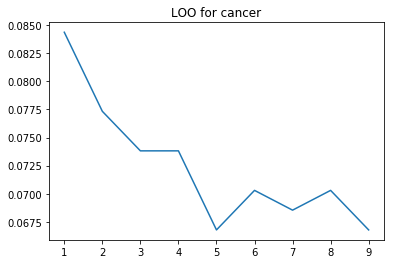

In [6]:
ks = list(range(1, 10))

ds = dataset_cancer
loos = [leave_one_out(ds[0], ds[1], k) for k in ks]

plt.plot(ks, loos)
plt.title('LOO for cancer')
plt.show()

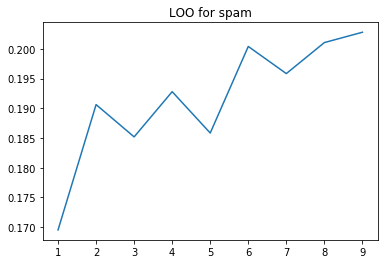

In [7]:
ks = list(range(1, 10))

ds = dataset_spam
loos = [leave_one_out(ds[0], ds[1], k) for k in ks]

plt.plot(ks, loos)
plt.title('LOO for spam')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(dataset):
    def scale_data(data):
        return MinMaxScaler().fit(data).transform(data)
    return scale_data(dataset[0]), dataset[1]

In [9]:
dataset_cancer_scaled = scale_min_max(dataset_cancer)
dataset_spam_scaled = scale_min_max(dataset_spam)

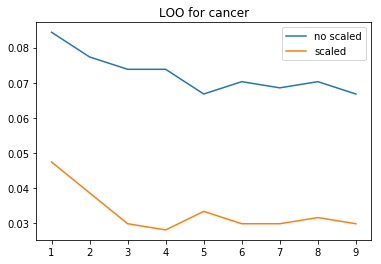

In [10]:
ks = list(range(1, 10))

ds = dataset_cancer
loos = [leave_one_out(ds[0], ds[1], k) for k in ks]

ds = dataset_cancer_scaled
loos_scaled = [leave_one_out(ds[0], ds[1], k) for k in ks]

plot1, = plt.plot(ks, loos)
plot2, = plt.plot(ks, loos_scaled)

plt.title("LOO for cancer")
plt.legend([plot1, plot2], ["no scaled", "scaled"])
plt.show()

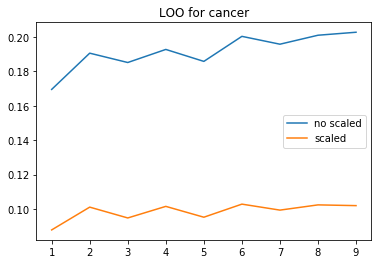

In [11]:
ks = list(range(1, 10))

ds = dataset_spam
loos = [leave_one_out(ds[0], ds[1], k) for k in ks]

ds = dataset_spam_scaled
loos_scaled = [leave_one_out(ds[0], ds[1], k) for k in ks]

plot1, = plt.plot(ks, loos)
plot2, = plt.plot(ks, loos_scaled)

plt.title("LOO for cancer")
plt.legend([plot1, plot2], ["no scaled", "scaled"])
plt.show()